<a href="https://colab.research.google.com/github/DavidMartinez16/Deep-Learning-Tensorflow/blob/master/Malaria_Parasite_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 45kB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 501kB 46.4MB/s 
     |████████████████████████████████| 4.3MB 32.6MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!git clone https://github.com/laxmimerit/Malaria-Classification-using-CNN.git

Cloning into 'Malaria-Classification-using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 45.13 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [4]:
img_width = 64
img_height = 64

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [6]:
train_data_generator = datagen.flow_from_directory(
    directory='/content/Malaria-Classification-using-CNN/malaria-dataset',
    target_size=(img_width, img_height), 
    class_mode='binary',
    batch_size=16,
    subset = 'training'
)

val_data_generator = datagen.flow_from_directory(
    directory='/content/Malaria-Classification-using-CNN/malaria-dataset',
    target_size=(img_width, img_height), 
    class_mode='binary',
    batch_size=16,
    subset = 'validation'
)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


# Building the CNN

In [7]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = val_data_generator,
                              validation_steps = len(val_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 156s 113ms/step - loss: 0.5710 - accuracy: 0.6993 - val_loss: 0.3208 - val_accuracy: 0.8920
Epoch 2/5
1378/1378 [==============================] - 157s 114ms/step - loss: 0.2651 - accuracy: 0.9208 - val_loss: 0.1902 - val_accuracy: 0.9310
Epoch 3/5
1378/1378 [==============================] - 156s 114ms/step - loss: 0.2017 - accuracy: 0.9366 - val_loss: 0.1888 - val_accuracy: 0.9425
Epoch 4/5
1378/1378 [==============================] - 154s 112ms/step - loss: 0.1793 - accuracy: 0.9442 - val_loss: 0.1996 - val_accuracy: 0.9303
Epoch 5/5
1378/1378 [==============================] - 154s 112ms/step - loss: 0.1696 - accuracy: 0.9482 - val_loss: 0.2023 - val_accuracy: 0.9245


In [17]:
def plot_training_curve(history, epochs):
  epoch_range = range(1,epochs+1)
  # Model Accuracy
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

  # Model Loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

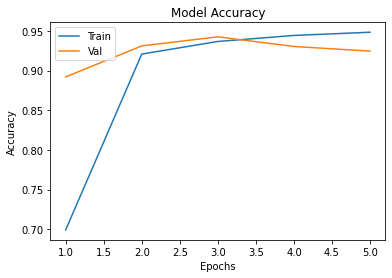

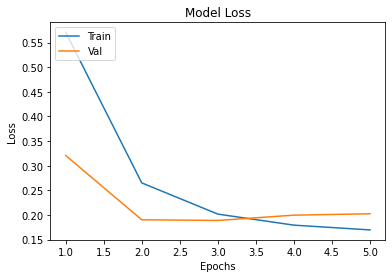

In [18]:
plot_training_curve(history, 5)